Aquí se realizará el entrenamiento de modelos capaces de predecir los Y

In [10]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2

import sys
sys.path.append('../')
from Utils import utils_nn as utlnn

In [2]:
x_test = pd.read_excel("../Train_Test/Dataset_Separado/x_test_new.xlsx")
x_train = pd.read_excel("../Train_Test/Dataset_Separado/x_train_new.xlsx")
y_test = pd.read_excel("../Train_Test/Dataset_Separado/y_test_new.xlsx")
y_train = pd.read_excel("../Train_Test/Dataset_Separado/y_train_new.xlsx")


In [3]:
## De mi y_train y y_test solo quiero las coordenadas Y
R0= 6.371E6 # [m]

out_y_coord = [f'y_{i}' for i in range(1,101)]
y_train_y = y_train[out_y_coord]/R0
y_test_y = y_test[out_y_coord]/R0
# 'y_test_y son las columnas filtradas de las 3 coordenadas'


los Epoch van en un rango de: 400 a 1500
los Batch Size van en un rango de: 70 a 130 (Puede cambiar dependiendo la salida)

In [ ]:
# epoch = 1500 #920
# b_s = 70
# act_name = 'relu'
# l2_reg = 0.00
# while epoch <= 1500:
#   while b_s <= 130:
    
#     inputs = Input(shape=(9,))
#     encoded = Dense(9, activation= act_name, kernel_regularizer= l2(l2_reg))(inputs)
#     encoded = Dense(16, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(32, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(64, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(80, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(90, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     decoded = Dense(100, activation= 'linear', kernel_regularizer= l2(l2_reg), name ='y_output')(encoded)

#     autoencoder_y = Model(inputs, decoded)
#     autoencoder_y.compile(optimizer = 'adam', loss= 'mse')
#     autoencoder_y.summary()

#     history = autoencoder_y.fit(x_train,y_train_y,
#                                 epochs = epoch,
#                                 batch_size = b_s,
#                                 validation_split = 0.1)
    
#     loss = autoencoder_y.evaluate(x_test,y_test_y)

#     if loss <= 35:
#       autoencoder_y.save(f'../modelos_entrenamiento/modelos_y/mod_y_{epoch}_{b_s}_vs10_Adam_loss_{round(loss)}.keras')
#     print(f'Pérdida en datos de Test: {loss} epoch: {epoch}, batch_size: {b_s}')
#     b_s +=20
#   b_s = 80
#   epoch +=40

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = 'val_loss',	#monitoriamos la pérdida en validación
  patience = 30, # Si no mejora en 10->20 epochs, detenemos el entrenamiento.
  restore_best_weights = True # Restaura los mejores pesos encontrados.
)

In [ ]:
act_name = "relu"
l2_reg = 0.0  
epoch = 440
b_s = 32

inputs = Input(shape=(9,))
encoded = Dense(9, activation= act_name, kernel_regularizer= l2(l2_reg))(inputs)
encoded = Dense(16, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(32, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(64, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(80, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(90, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
decoded = Dense(100, activation= 'linear', kernel_regularizer= l2(l2_reg), name ='y_output')(encoded)

autoencoder_y = Model(inputs, decoded)
autoencoder_y.compile(optimizer = 'adamW', loss= 'mse', metrics = ['mae'])
autoencoder_y.summary()

history = autoencoder_y.fit(x_train,y_train_y,
														epochs = epoch,
														batch_size = b_s,
														validation_split = 0.1,
                            callbacks = [early_stopping])


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_output (Dense)                │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,496 (95.69 KB)

 Trainable params: 24,496 (95.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 216.8347 - mae: 6.7366 - val_loss: 0.2529 - val_mae: 0.4349
Epoch 2/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2234 - mae: 0.4017 - val_loss: 0.1291 - val_mae: 0.2893
Epoch 3/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0974 - mae: 0.2466 - val_loss: 0.0297 - val_mae: 0.1320
Epoch 4/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0238 - mae: 0.1144 - val_loss: 0.0135 - val_mae: 0.0841
Epoch 5/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mae: 0.0822 - val_loss: 0.0109 - val_mae: 0.0729
Epoch 6/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - mae: 0.0708 - val_loss: 0.0085 - val_mae: 0.0676
Epoch 7/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mae: 0.0670 - val_loss: 0.0074 - val_mae: 0.0633
Epoch 8/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mae: 0.0620 - val_loss: 0.0067 - val_mae: 0.0605
Epoch 9/440
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

In [59]:
loss = autoencoder_y.evaluate(x_test,y_test_y)
print(f'Pérdida en datos de Test: {loss}')

mae_in_m = loss[1]*R0
print(f'mae:{mae_in_m}[m]')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5587e-04 - mae: 0.0063
Pérdida en datos de Test: [0.00016126227274071425, 0.006278442684561014]
mae:39999.95834333822[m]


In [66]:
idx = 333

# print(x_test.iloc[idx])
 # Elegir una muestra para comparar (observar luego la muestra 30)

# Predicción de una muestra 
y_pred = autoencoder_y.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test_y.iloc[idx] # Se obtine Algo de tipo Serie
y_true=y_true.to_numpy() # Transform a Numpy array
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


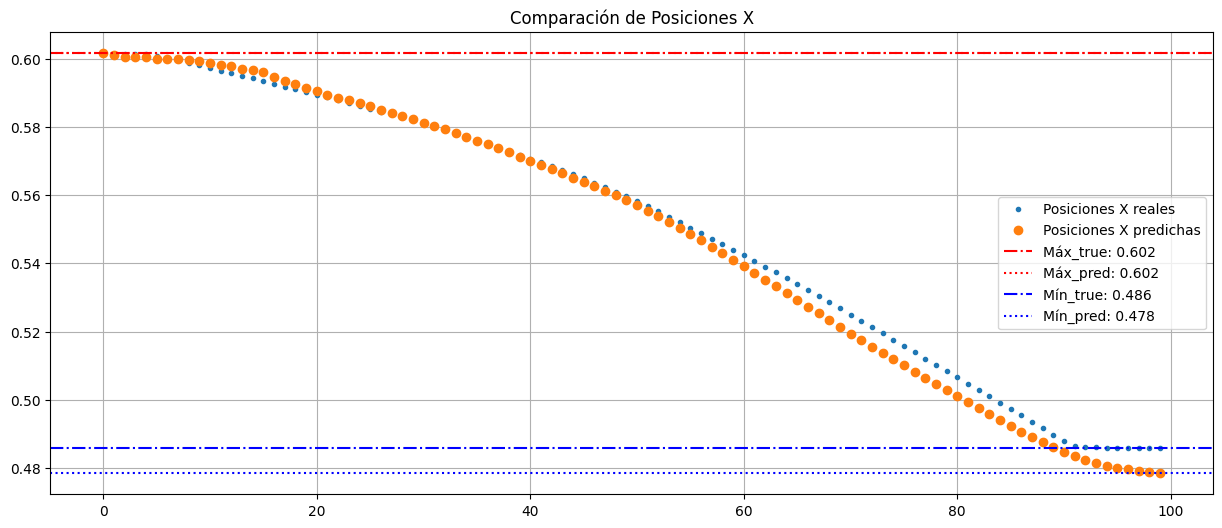

In [ ]:
##Graficamos 
# Buscamos los máximos y mínimos 
y_true_max = np.max(y_true)
y_true_min = np.min(y_true)

y_pred_max = np.max(y_pred)
y_pred_min = np.min(y_pred)

# Pos y
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones Z reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones Z predichas', linestyle = 'None',marker='o')
# Dibujamos los max y min
plt.axhline(y = y_true_max, color = 'red', linestyle = '-.', label=f'Máx_true: {y_true_max:.3f}')
plt.axhline(y = y_pred_max, color = 'red', linestyle = ':', label= f'Máx_pred: {y_pred_max:.3f}')
plt.axhline(y = y_true_min, color = 'blue', linestyle ='-.', label=f'Mín_true: {y_true_min:.3f}')
plt.axhline(y = y_pred_min, color = 'blue', linestyle = ':',label= f'Mín_pred:{y_pred_min: .3f}')

# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
save_model = False

if save_model == True:
  autoencoder_y.save('../modelos_entrenamiento/mod_y_R0/mod_y_427_32_vs10_adamW_l2_0.keras')
